In [12]:
import sys
sys.path.append("../")
import models
import models_utils
from mcmc_utils import *
from utils import *

%matplotlib inline

In [13]:
import seaborn as sns
import math
import pandas as pd

In [14]:
m = models.PapaModelC8()
predict = m.predict
data = m.y
error = 0.1
weight_vector = m.domains

prior_min = [0.0001, 0.0001, 0.0001, 1., 3.5, 3.5, 3.5, 3.5]
prior_max = [1., 2., 2., 200., 9., 9., 9., 9.]

In [51]:
param_values = []
SAMPLES = 5000
for index in range(SAMPLES):
    while(True):
        params = initialise(prior_min, prior_max)
        LL = calculate_log_likelihood(data, error, weight_vector, params, m.predict)
        if (not math.isnan(LL)):
            break
    params.append(LL)
    param_values.append(params)
colmn_names = ["alpha", "D", "Co", "Ns", "K", "K1", "K2", "K3", "LL"]
param_values = pd.DataFrame(param_values, columns = colmn_names)

In [52]:
THRESH = -1500
print sum(param_values["LL"] > THRESH)
print param_values[param_values["LL"] > THRESH].mean()
print param_values[param_values["LL"] > THRESH].std()
parm_vals = param_values[param_values["LL"] > THRESH]

116
alpha       0.222064
D           1.049698
Co          1.156814
Ns        109.982759
K           5.997798
K1          6.375816
K2          6.579531
K3          6.454578
LL      -1242.090245
dtype: float64
alpha      0.269652
D          0.510390
Co         0.543942
Ns        57.922284
K          1.146080
K1         1.425925
K2         1.564212
K3         1.293227
LL       249.584456
dtype: float64


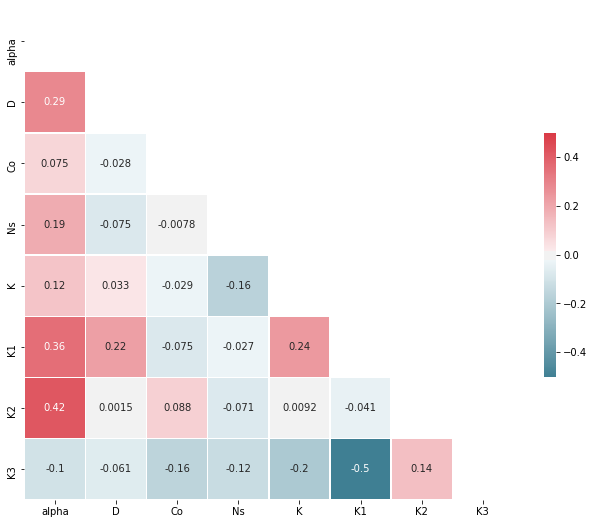

In [53]:
corr = parm_vals[["alpha", "D", "Co", "Ns", "K", "K1", "K2", "K3"]].corr(method = "spearman")

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

In [56]:
corr

,alpha,D,Co,Ns,K,K1,K2,K3
alpha,1.000000,0.286065,0.074563,0.189804,0.121770,0.357214,0.418053,-0.102380
D,0.286065,1.000000,-0.028424,-0.075064,0.032730,0.223527,0.001507,-0.061169
Co,0.074563,-0.028424,1.000000,-0.007758,-0.028855,-0.075485,0.088410,-0.158551
Ns,0.189804,-0.075064,-0.007758,1.000000,-0.163804,-0.026604,-0.071089,-0.124417
K,0.121770,0.032730,-0.028855,-0.163804,1.000000,0.238873,0.009172,-0.204298
K1,0.357214,0.223527,-0.075485,-0.026604,0.238873,1.000000,-0.040503,-0.503910
K2,0.418053,0.001507,0.088410,-0.071089,0.009172,-0.040503,1.000000,0.138092
K3,-0.102380,-0.061169,-0.158551,-0.124417,-0.204298,-0.503910,0.138092,1.000000
